## Data Inspection CheXpert (and relation to NIH)

To do
- [x] converting uncertain labels to 0
- [x] Validation data
- [x] Patient demographics
- [x] patient/image distribution
- [x] NIH labels

In [1]:
img_path='../../visualization/data/data_pretty/'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_chex_path = './CheXpert-v1.0-small/train.csv'
train_chex = pd.read_csv(train_chex_path)

In [4]:
train_chex.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [5]:
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Verdana']

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=13) #fontsize of the x and y labels
plt.rc('xtick', labelsize=13) #fontsize of the x tick labels
plt.rc('ytick', labelsize=13) #fontsize of the y tick labels
plt.rc('legend', fontsize=13) #fontsize of the legend

In [6]:
cmap = plt.cm.get_cmap('cividis')

In [8]:
cmap(0.2)

(0.208926, 0.272546, 0.424809, 1.0)

## View

Frontal    191027
Lateral     32387
Name: Frontal/Lateral, dtype: int64
Percentage lateral: 0.14


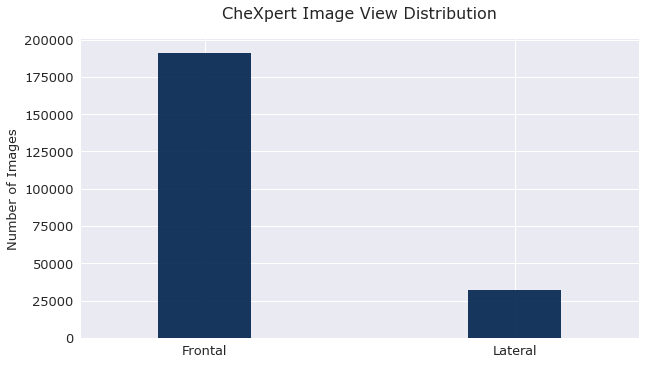

In [8]:
f_l_counts = train_chex['Frontal/Lateral'].value_counts()
fig, ax = plt.subplots(facecolor='white', figsize=(10, 5.5))
f_l_counts.plot(kind='bar', colormap='cividis', alpha=0.9, width=0.3)
ax.set_ylabel('Number of Images')
ax.tick_params(axis='x', labelrotation= 0)
ax.set_title('CheXpert Image View Distribution', pad=20)
# plt.savefig(img_path+'front_lat.png', dpi=300, facecolor='white', bbox_inches = 'tight')
print(f_l_counts)
print(f"Percentage lateral: {round(f_l_counts['Lateral']/sum(f_l_counts),2)}")

AP    161590
PA     29420
LL        16
RL         1
Name: AP/PA, dtype: int64


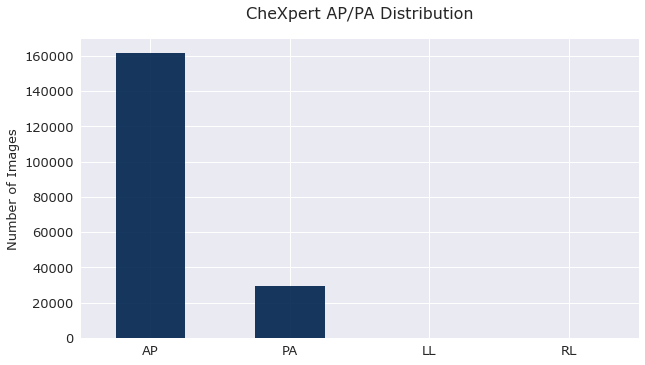

In [9]:
a_p = train_chex['AP/PA'].value_counts()
fig, ax = plt.subplots(facecolor='white', figsize=(10, 5.5))
a_p.plot(kind='bar', colormap='cividis', alpha=0.9)
ax.set_ylabel('Number of Images')
ax.tick_params(axis='x', labelrotation= 0)
ax.set_title('CheXpert AP/PA Distribution', pad=20)
# plt.savefig(img_path+'ap_pa.png', dpi=300, facecolor='white', bbox_inches = 'tight')

print(a_p)

## Missing Values

No Finding                    201033
Enlarged Cardiomediastinum    178575
Cardiomegaly                  177211
Lung Opacity                  105636
Lung Lesion                   211470
Edema                         137458
Consolidation                 152792
Pneumonia                     195806
Atelectasis                   154971
Pneumothorax                  144480
Pleural Effusion               90203
Pleural Other                 216922
Fracture                      211220
Support Devices               100197
dtype: int64


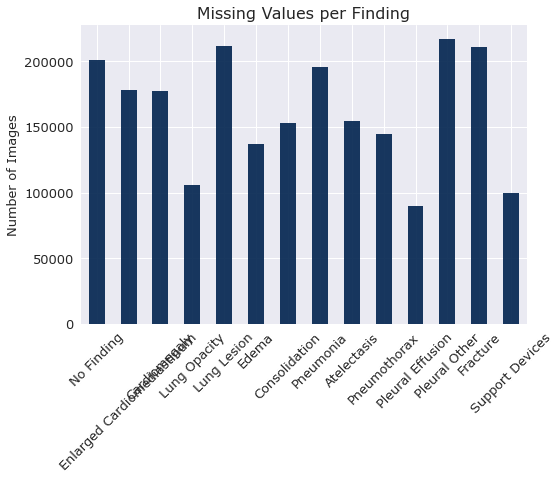

In [11]:
fig, ax = plt.subplots(facecolor='white')
train_chex.iloc[:,5:].isna().sum().plot(kind='bar', colormap='cividis', alpha=0.9)
ax.set_ylabel('Number of Images')
ax.tick_params(axis='x', labelrotation= 45)
ax.set_title('Missing Values per Finding')
# ax.set_facecolor('white')
# plt.savefig(img_path+'miss_values.png', dpi=300, facecolor='white', bbox_inches = 'tight')

print(train_chex.iloc[:,5:].isna().sum())

Missing values represent no mention found by the labeler, so it is treated as negative for the finding.  
https://github.com/stanfordmlgroup/chexpert-labeler/issues/9

In [12]:
train_chex.fillna(0, inplace=True)

## Label Distribution

In [13]:
uncertain = train_chex[train_chex == -1.0].iloc[:,5:].count()
pos = train_chex[train_chex == 1.0].iloc[:,5:].count()
neg = train_chex[train_chex == 0].iloc[:,5:].count()

In [14]:
pos_perc = pos/len(train_chex)

In [15]:
fix_labels = list(pos_perc.index)
fix_labels[1] = 'Enl. Cardiom.'

No Finding                    0.100177
Enlarged Cardiomediastinum    0.048332
Cardiomegaly                  0.120852
Lung Opacity                  0.472580
Lung Lesion                   0.041116
Edema                         0.233853
Consolidation                 0.066169
Pneumonia                     0.027031
Atelectasis                   0.149391
Pneumothorax                  0.087049
Pleural Effusion              0.385773
Pleural Other                 0.015769
Fracture                      0.040463
Support Devices               0.519220
dtype: float64


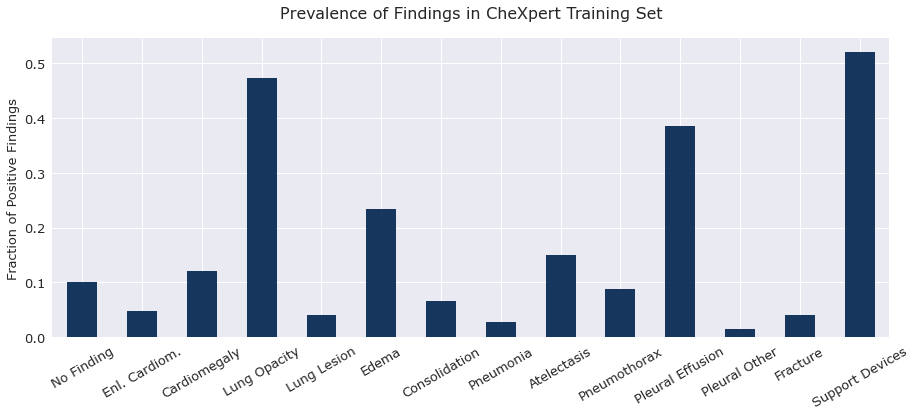

In [16]:
fig, ax = plt.subplots(facecolor='white', figsize=(15,5.5))
pos_perc.plot(kind='bar', colormap='cividis', alpha=0.9)
ax.set_ylabel('Fraction of Positive Findings')
ax.set_xticklabels(fix_labels)
ax.tick_params(axis='x', labelrotation= 30)
ax.set_title('Prevalence of Findings in CheXpert Training Set', pad=20)
# plt.savefig(img_path+'prevalence_train.png', dpi=300, facecolor='white', bbox_inches = 'tight')
print(pos_perc)

This differs slightly from the prevalences reported in Irvin et al. Why?

In [17]:
#percentage of uncertain labels overall
sum(uncertain)/(len(uncertain)*len(train_chex)) #uncertain labels make up 5% of all labels
#THIS IS DIFFERENT FROM THE OVERALL NUMBER OF ROWS AFFECTED

0.04474652438969805

In [18]:
no_unc = train_chex[~train_chex.isin([-1]).any(axis=1)]
print(f'Number of images: {len(train_chex)}\nNumber of images without uncertainty label: {len(no_unc)}\nPercentage of images remaining: {len(no_unc)/len(train_chex)}')

Number of images: 223414
Number of images without uncertainty label: 138358
Percentage of images remaining: 0.619289749075707


In [19]:
#percentages of uncertain labels per label
for col in train_chex.iloc[:,5:].columns:
    len_data = len(train_chex)
    print(col, round(train_chex[train_chex==-1.0][col].count()/len(train_chex),2))

No Finding 0.0
Enlarged Cardiomediastinum 0.06
Cardiomegaly 0.04
Lung Opacity 0.03
Lung Lesion 0.01
Edema 0.06
Consolidation 0.12
Pneumonia 0.08
Atelectasis 0.15
Pneumothorax 0.01
Pleural Effusion 0.05
Pleural Other 0.01
Fracture 0.0
Support Devices 0.0


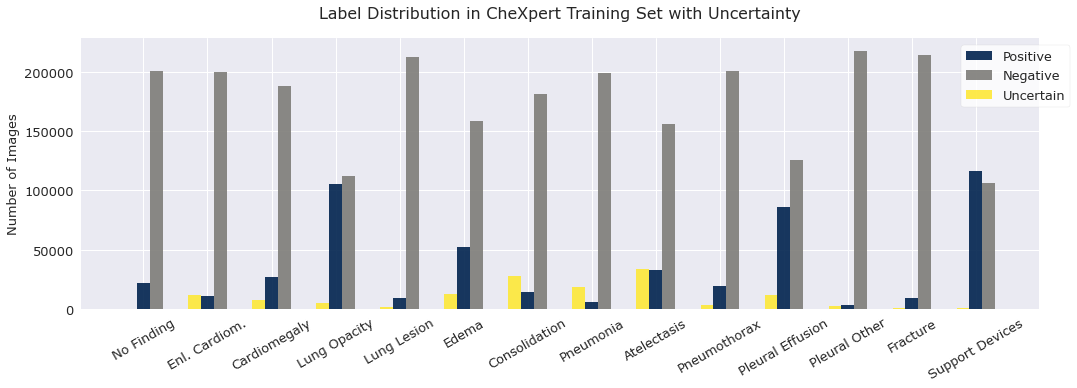

In [63]:
X = list(uncertain.index)
X_axis = np.arange(len(uncertain))

f = plt.figure(facecolor='white', figsize=(15,5.5))
# plt.set_cmap('cividis')
# f.set_figwidth(20)
# f.set_figheight(5)

plt.bar(X_axis, pos, 0.2, label = 'Positive', color=cmap(0.), alpha=0.9)
plt.bar(X_axis+0.2, neg, 0.2, label='Negative',color=cmap(0.5), alpha=0.9)
plt.bar(X_axis - 0.2, uncertain, 0.2, label = 'Uncertain', color=cmap(1.), alpha=0.9)
  
plt.xticks(X_axis, fix_labels)
plt.ylabel("Number of Images")
plt.title("Label Distribution in CheXpert Training Set with Uncertainty", pad=20)
leg = plt.legend(bbox_to_anchor=(0.54, 0.5, 0.5, 0.5), frameon=True)
leg.get_frame().set_facecolor('white')
plt.xticks(rotation=30)

plt.tight_layout()

# f.savefig(img_path+'label_uncertain.png', dpi=300, facecolor='white', bbox_inches = 'tight')
plt.plot()
plt.show()

The proportion of uncertain values does not exceed 15% for individual findings. The distribution of indications per label are highly imbalanced. This should be taken into account when evaluating the performance of a model.

In [64]:
#replace uncertainty labels with 0
train_chex.replace(-1, 0, inplace=True)

In [65]:
pos = train_chex[train_chex == 1.0].iloc[:,5:].count()
neg = train_chex[train_chex == 0].iloc[:,5:].count()

In [66]:
#positive-negative ratios
for finding in pos.index:
    print(f"{finding} {round(pos[finding]/(pos[finding]+neg[finding]),2)}:{round(neg[finding]/(pos[finding]+neg[finding]),2)}")

No Finding 0.1:0.9
Enlarged Cardiomediastinum 0.05:0.95
Cardiomegaly 0.12:0.88
Lung Opacity 0.47:0.53
Lung Lesion 0.04:0.96
Edema 0.23:0.77
Consolidation 0.07:0.93
Pneumonia 0.03:0.97
Atelectasis 0.15:0.85
Pneumothorax 0.09:0.91
Pleural Effusion 0.39:0.61
Pleural Other 0.02:0.98
Fracture 0.04:0.96
Support Devices 0.52:0.48


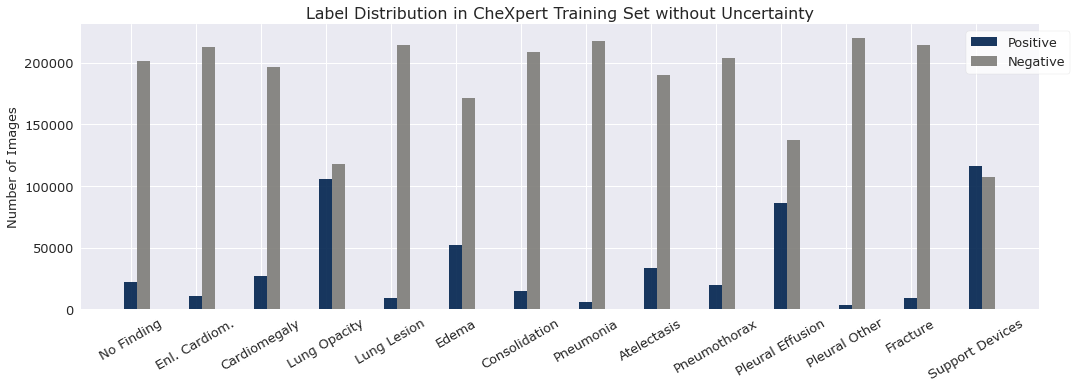

In [69]:
X = list(pos.index)
X_axis = np.arange(len(pos))

f = plt.figure(facecolor='white', figsize=(15,5.5))
# f.set_figwidth(20)
# f.set_figheight(5)

plt.bar(X_axis, pos, -0.2, label = 'Positive', color=cmap(0.), alpha=0.9)
plt.bar(X_axis+0.2, neg, 0.2, label='Negative', color=cmap(0.5), alpha=0.9)
  
plt.xticks(X_axis, fix_labels)
plt.ylabel("Number of Images")
plt.title("Label Distribution in CheXpert Training Set without Uncertainty")
leg = plt.legend(bbox_to_anchor=(0.54, 0.5, 0.5, 0.5), frameon=True)
leg.get_frame().set_facecolor('white')
plt.xticks(rotation=30)

plt.tight_layout()

# f.savefig(img_path+'label_wo_uncertain.png', dpi=300, facecolor='white', bbox_inches = 'tight')

# plt.plot()
# plt.show()

In [12]:
pos

No Finding                     22381
Enlarged Cardiomediastinum     10798
Cardiomegaly                   27000
Lung Opacity                  105581
Lung Lesion                     9186
Edema                          52246
Consolidation                  14783
Pneumonia                       6039
Atelectasis                    33376
Pneumothorax                   19448
Pleural Effusion               86187
Pleural Other                   3523
Fracture                        9040
Support Devices               116001
dtype: int64

## Patient Demographics

Male       132636
Female      90777
Unknown         1
Name: Sex, dtype: int64


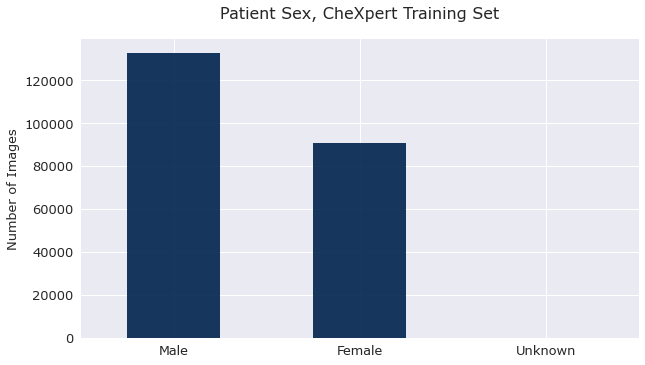

In [20]:
sex_dist = train_chex['Sex'].value_counts()
fig, ax = plt.subplots(facecolor='white', figsize=(10, 5.5))
sex_dist.plot(kind='bar', title='Patient Sex, Training Set', colormap='cividis', alpha=0.9, width=0.5)
ax.set_ylabel('Number of Images')
ax.tick_params(axis='x', labelrotation= 0)
ax.set_title('Patient Sex, CheXpert Training Set', pad=20)
ax.set_xlabel('')
# plt.savefig(img_path+'patient_sex.png', dpi=300, facecolor='white', bbox_inches = 'tight')
print(sex_dist)

0         68
1         87
2         83
3         83
4         41
          ..
223409    59
223410    59
223411     0
223412     0
223413     0
Name: Age, Length: 223414, dtype: int64


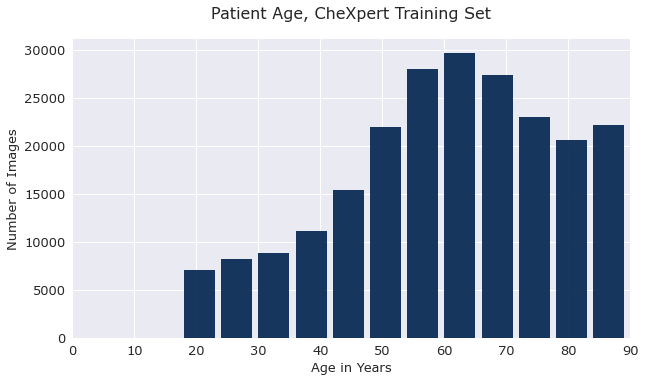

In [170]:
age_dist = train_chex['Age']
fig, ax = plt.subplots(facecolor='white', figsize=(10,5.5))
age_dist.plot.hist(width=5, bins=15, title="Patient Age, CheXpert Training Set", colormap='cividis', alpha=0.9)
ax.set_ylabel('Number of Images')
ax.set_xlabel('Age in Years')
ax.tick_params(axis='x', labelrotation= 0)
ax.set_title('Patient Age, CheXpert Training Set', pad=20)
plt.xlim((0,90))
# plt.savefig(img_path+'patient_age.png', dpi=300, facecolor='white', bbox_inches = 'tight')
print(age_dist)

## Validation Data

In [12]:
val_chex_path = './CheXpert-v1.0-small/valid.csv'
val_chex = pd.read_csv(val_chex_path)

In [78]:
val_chex.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
len(val_chex)

234

In [80]:
pos = val_chex[val_chex == 1.0].iloc[:,5:].count()
neg = val_chex[val_chex == 0].iloc[:,5:].count()

In [81]:
pos

No Finding                     38
Enlarged Cardiomediastinum    109
Cardiomegaly                   68
Lung Opacity                  126
Lung Lesion                     1
Edema                          45
Consolidation                  33
Pneumonia                       8
Atelectasis                    80
Pneumothorax                    8
Pleural Effusion               67
Pleural Other                   1
Fracture                        0
Support Devices               107
dtype: int64

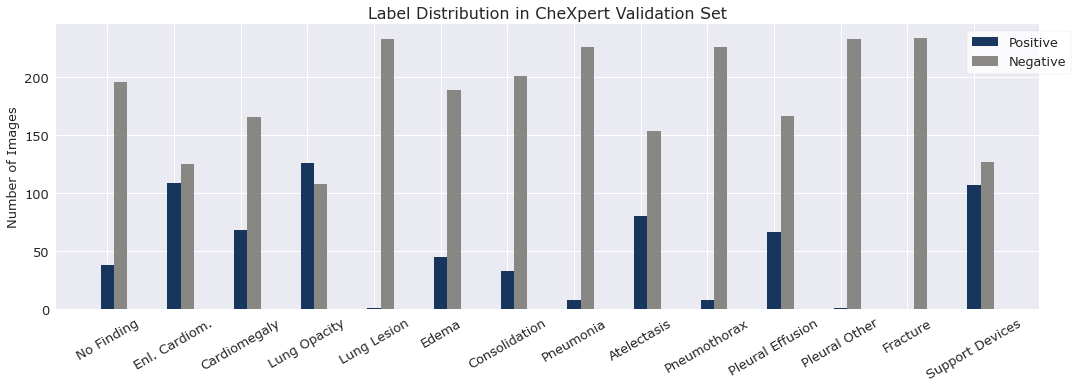

In [83]:
X = list(pos.index)
X_axis = np.arange(len(pos))

f = plt.figure(facecolor='white', figsize=(15,5.5))
# f.set_figwidth(20)
# f.set_figheight(5)

plt.bar(X_axis, pos, -0.2, label = 'Positive', color=cmap(0.), alpha=0.9)
plt.bar(X_axis+0.2, neg, 0.2, label='Negative', color=cmap(0.5), alpha=0.9)
  
plt.xticks(X_axis, fix_labels)
plt.ylabel("Number of Images")
plt.title("Label Distribution in CheXpert Validation Set")
leg = plt.legend(bbox_to_anchor=(0.54, 0.5, 0.5, 0.5), frameon=True)
leg.get_frame().set_facecolor('white')
plt.xticks(rotation=30)

plt.tight_layout()
# f.savefig(img_path+'label_val.png', dpi=300, facecolor='white', bbox_inches = 'tight')
plt.plot()
plt.show()

In [84]:
pos

No Finding                     38
Enlarged Cardiomediastinum    109
Cardiomegaly                   68
Lung Opacity                  126
Lung Lesion                     1
Edema                          45
Consolidation                  33
Pneumonia                       8
Atelectasis                    80
Pneumothorax                    8
Pleural Effusion               67
Pleural Other                   1
Fracture                        0
Support Devices               107
dtype: int64

Male      128
Female    106
Name: Sex, dtype: int64


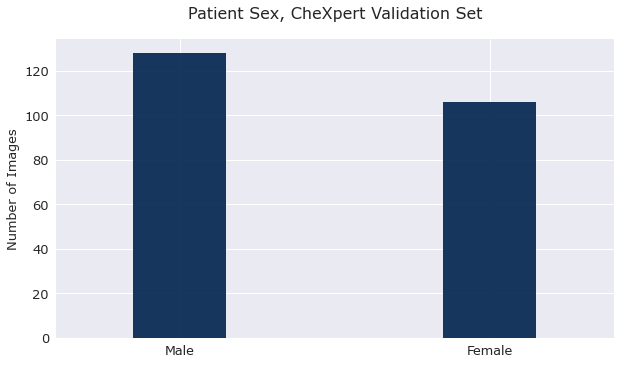

In [21]:
sex_dist = val_chex['Sex'].value_counts()
fig, ax = plt.subplots(facecolor='white', figsize=(10,5.5))
sex_dist.plot(kind='bar', colormap='cividis', alpha=0.9, width=0.3)
ax.set_ylabel('Number of Images')
ax.tick_params(axis='x', labelrotation= 0)
ax.set_title('Patient Sex, CheXpert Validation Set', pad=20)
# plt.savefig(img_path+'patient_sex_val.png', dpi=300, facecolor='white', bbox_inches = 'tight')
print(sex_dist)


0      73
1      70
2      70
3      85
4      42
       ..
229    57
230    65
231    71
232    45
233    90
Name: Age, Length: 234, dtype: int64


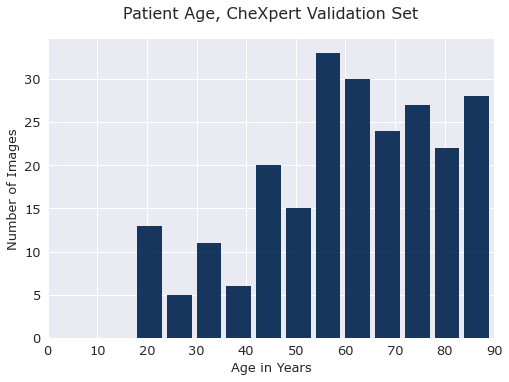

In [13]:
age_dist = val_chex['Age']
fig, ax = plt.subplots(facecolor='white')
age_dist.plot.hist(width=5, bins=12, colormap='cividis', alpha=0.9)
ax.set_ylabel('Number of Images')
ax.set_xlabel('Age in Years')
ax.tick_params(axis='x', labelrotation= 0)
ax.set_title('Patient Age, CheXpert Validation Set', pad=20)
plt.xlim((0,90))
# plt.savefig(img_path+'patient_age_val.png', dpi=300, facecolor='white', bbox_inches = 'tight')
print(age_dist)

# age_dist = val_chex['Age']
# age_dist.plot.hist(width=4, bins=13, title="Patient Age, Validation Set")

## Patient-Image Relation

In [150]:
#distribution of how many images per patient
patient_paths = train_chex['Path']

In [151]:
patient_paths = patient_paths.str.split('/')

In [152]:
patient_paths = patient_paths.apply(lambda x: x[2])

In [153]:
patient_paths

0         patient00001
1         patient00002
2         patient00002
3         patient00002
4         patient00003
              ...     
223409    patient64537
223410    patient64537
223411    patient64538
223412    patient64539
223413    patient64540
Name: Path, Length: 223414, dtype: object

In [154]:
patient_paths.value_counts()

patient28746    92
patient33155    92
patient04462    89
patient24163    86
patient34615    85
                ..
patient62367     1
patient49332     1
patient20261     1
patient63249     1
patient44571     1
Name: Path, Length: 64540, dtype: int64

In [163]:
# img_per_patient = [(idx, row) for idx, row in zip(patient_paths.value_counts().value_counts().index, patient_paths.value_counts().value_counts())]
# for tup in img_per_patient:
#     print(tup)

In [155]:
plot_patients = patient_paths.value_counts()[patient_paths.value_counts() < 21]

In [158]:
plot_patients.value_counts().sort_index()

1     22581
2     17547
3      6965
4      4685
5      2910
6      2154
7      1414
8      1168
9       909
10      685
11      555
12      432
13      351
14      301
15      245
16      198
17      152
18      176
19      125
20      130
Name: Path, dtype: int64

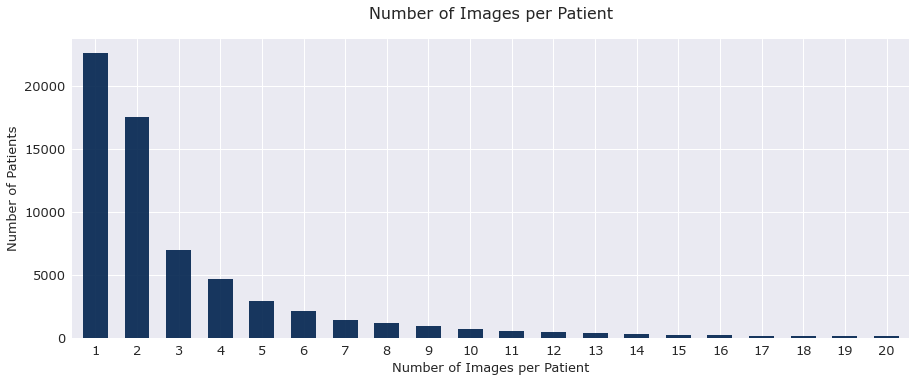

In [162]:
X_axis = np.arange(20)

fig, ax = plt.subplots(facecolor='white')
fig.set_figwidth(15)
fig.set_figheight(5.5)

plot_patients.value_counts().sort_index().plot(kind='bar', xlim=(0,20), width=0.6,colormap='cividis', alpha=0.9)

ax.set_title("Number of Images per Patient", pad=20)
ax.set_ylabel('Number of Patients')
ax.set_xlabel('Number of Images per Patient')

ax.tick_params(axis='x', labelrotation= 0)
# plt.savefig(img_path+'img_patient.png', dpi=300, facecolor='white', bbox_inches = 'tight')


## NIH Data

In [91]:
nih_path = '../reproduce-chexnet-master/nih_labels.csv'
nih_data = pd.read_csv(nih_path)

In [28]:
nih_data.head()

,Image Index,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,Cardiomegaly,Emphysema,Effusion,Hernia,...,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation,fold
0,00000001_000.png,0,1,058Y,M,PA,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
1,00000001_001.png,1,1,058Y,M,PA,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
2,00000001_002.png,2,1,058Y,M,PA,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
3,00000002_000.png,0,2,081Y,M,PA,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
4,00000003_000.png,0,3,081Y,F,PA,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train


In [71]:
nih_label_names = set(nih_data.columns[6:-1])
chexpert_label_names = set(pos.index)

In [37]:
nih_label_names, chexpert_label_names, nih_label_names.intersection(chexpert_label_names)

({'Atelectasis',
  'Cardiomegaly',
  'Consolidation',
  'Edema',
  'Effusion',
  'Emphysema',
  'Fibrosis',
  'Hernia',
  'Infiltration',
  'Mass',
  'Nodule',
  'Pleural_Thickening',
  'Pneumonia',
  'Pneumothorax'},
 {'Atelectasis',
  'Cardiomegaly',
  'Consolidation',
  'Edema',
  'Enlarged Cardiomediastinum',
  'Fracture',
  'Lung Lesion',
  'Lung Opacity',
  'No Finding',
  'Pleural Effusion',
  'Pleural Other',
  'Pneumonia',
  'Pneumothorax',
  'Support Devices'},
 {'Atelectasis',
  'Cardiomegaly',
  'Consolidation',
  'Edema',
  'Pneumonia',
  'Pneumothorax'})

Pleural Effusion/Effusion are also considered to refer to the same concept (Lenga et al., Continual Learning).  
The five CheXpert competition labels are Atelectasis, Cardiomegaly, Consolidation, Edema, Pleural Effusion. All of these also occur in the NIH dataset. 

In [52]:
len(nih_data)

112120

In [92]:
pos = nih_data[nih_data.fold=='train'][nih_data == 1].iloc[:,6:-1].count()
neg = nih_data[nih_data.fold=='train'][nih_data == 0].iloc[:,6:-1].count()

In [68]:
pos

Cardiomegaly           1950
Emphysema              1799
Effusion               9261
Hernia                  144
Infiltration          13914
Mass                   3988
Nodule                 4375
Atelectasis            7996
Pneumothorax           3705
Pleural_Thickening     2279
Pneumonia               978
Fibrosis               1158
Edema                  1690
Consolidation          3263
dtype: int64

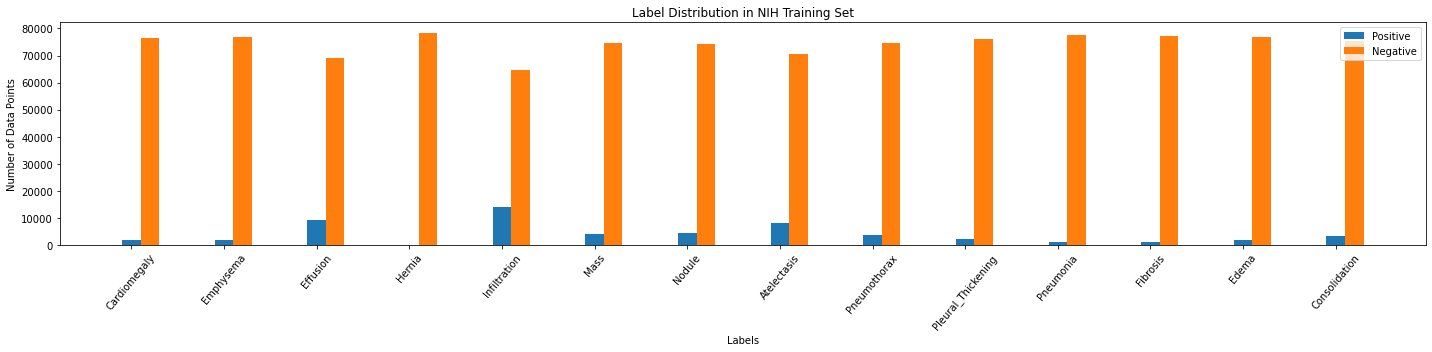

In [93]:
X = list(pos.index)
X_axis = np.arange(len(pos))

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.bar(X_axis, pos, -0.2, label = 'Positive')
plt.bar(X_axis+0.2, neg, 0.2, label='Negative')
  
plt.xticks(X_axis, X)
plt.xlabel("Labels")
plt.ylabel("Number of Data Points")
plt.title("Label Distribution in NIH Training Set")
plt.legend()
plt.xticks(rotation=50)

plt.tight_layout()
# f.savefig(img_path+'label_NIH.png')
plt.plot()
plt.show()